In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, auc, accuracy_score,  classification_report, precision_recall_curve, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import metrics
from sklearn.calibration import calibration_curve
import os

In [2]:
df_sissi = pd.DataFrame(pd.read_excel("/mnt/bernhard/Masterarbeit/2.Versuch/Data/SISSIz_Excel/sissi.xlsx"))
df_sissiz_mono = pd.DataFrame(pd.read_excel("/mnt/bernhard/Masterarbeit/2.Versuch/Data/SISSIz_Excel/sissiz_mono.xlsx"))
df_sissiz_di = pd.DataFrame(pd.read_excel("/mnt/bernhard/Masterarbeit/2.Versuch/Data/SISSIz_Excel/sissiz_di.xlsx"))
df_multiperm_mono = pd.DataFrame(pd.read_excel("/mnt/bernhard/Masterarbeit/2.Versuch/Data/SISSIz_Excel/multiperm_mono.xlsx"))
df_multiperm_di = pd.DataFrame(pd.read_excel("/mnt/bernhard/Masterarbeit/2.Versuch/Data/SISSIz_Excel/multiperm_di.xlsx"))
df_aln_shuffle = pd.DataFrame(pd.read_excel("/mnt/bernhard/Masterarbeit/2.Versuch/Data/SISSIz_Excel/alifoldz.xlsx"))

save_path = "/mnt/bernhard/Masterarbeit/2.Versuch/Plots/Randomized/SISSIz/"

In [5]:
df_sissi.head(10)

,Mean Pairwise Identity (MPI) of the input alignment,Average MPI of the sampled alignments,Standard deviation of the MPIs of the sampled alignments,Structural Conservation Index (SCI),GC-Content,RNAalifold consensus Minimum Free Energy (MFE) of the original alignment,Average consensus MFE in the sampled alignments,Standard deviation of the consensus MFE in the sampled alignments,z-score calculated from 7 8 and 9,File
0,0.8865,0.8768,0.0044,0.5695,0.5505,-96.27,-10.75,4.20,-20.37,pos_sample_output_40355.txt
1,0.8704,0.8612,0.0047,0.5049,0.4534,-66.13,-5.52,3.71,-16.36,pos_sample_output_2635.txt
2,0.8737,0.8643,0.0051,0.6024,0.4931,-94.85,-6.40,3.60,-24.54,pos_sample_output_60625.txt
3,0.8682,0.8590,0.0051,0.5652,0.4821,-80.74,-4.18,3.00,-25.55,pos_sample_output_40301.txt
4,0.8718,0.8617,0.0042,0.4815,0.4892,-68.16,-3.93,2.87,-22.40,pos_sample_output_20012.txt
5,0.8834,0.8745,0.0043,0.6239,0.4878,-92.59,-7.22,4.21,-20.29,pos_sample_output_92804.txt
6,0.8715,0.8616,0.0048,0.5642,0.4889,-83.09,-7.57,4.11,-18.38,pos_sample_output_92186.txt
7,0.8780,0.8686,0.0038,0.6002,0.5042,-90.44,-5.96,3.54,-23.85,pos_sample_output_96943.txt
8,0.8703,0.8630,0.0043,0.5743,0.5123,-90.97,-6.71,3.82,-22.07,pos_sample_output_69933.txt
9,0.8674,0.8565,0.0048,0.5497,0.4778,-83.26,-5.11,3.27,-23.87,pos_sample_output_57307.txt


In [6]:
df_sissi[['Mean Pairwise Identity (MPI) of the input alignment',
        'Average MPI of the sampled alignments',
        'Standard deviation of the MPIs of the sampled alignments',
        'Structural Conservation Index (SCI)',	
        'GC-Content',
        'RNAalifold consensus Minimum Free Energy (MFE) of the original alignment',
        'Average consensus MFE in the sampled alignments',
        'Standard deviation of the consensus MFE in the sampled alignments',
        'z-score calculated from 7 8 and 9']].describe()

,Mean Pairwise Identity (MPI) of the input alignment,Average MPI of the sampled alignments,Standard deviation of the MPIs of the sampled alignments,Structural Conservation Index (SCI),GC-Content,RNAalifold consensus Minimum Free Energy (MFE) of the original alignment,Average consensus MFE in the sampled alignments,Standard deviation of the consensus MFE in the sampled alignments,z-score calculated from 7 8 and 9
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.873373,0.863790,0.004573,0.570143,0.484716,-83.164023,-5.637863,3.354571,-23.446330
std,0.006927,0.007268,0.000394,0.073108,0.026802,13.266859,1.517351,0.497792,4.314502
min,0.841600,0.833000,0.003000,0.249300,0.371600,-148.150000,-15.770000,1.420000,-49.560000
25%,0.868800,0.859000,0.004300,0.521600,0.466700,-92.170000,-6.570000,3.010000,-26.130000
50%,0.873500,0.863900,0.004600,0.572100,0.484600,-83.070000,-5.510000,3.340000,-23.180000
75%,0.878100,0.868700,0.004800,0.620600,0.502900,-74.120000,-4.550000,3.680000,-20.450000
max,0.899400,0.891000,0.006500,0.841500,0.601300,-30.780000,-1.390000,6.640000,-8.540000


In [7]:
df_sissiz_mono.head(10)

,Mean Pairwise Identity (MPI) of the input alignment,Average MPI of the sampled alignments,Standard deviation of the MPIs of the sampled alignments,Structural Conservation Index (SCI),GC-Content,RNAalifold consensus Minimum Free Energy (MFE) of the original alignment,Average consensus MFE in the sampled alignments,Standard deviation of the consensus MFE in the sampled alignments,z-score calculated from 7 8 and 9,File
0,0.8770,0.8678,0.0044,0.0712,0.5090,-9.20,-8.26,3.40,-0.28,neg_sample_SISSIz_mono_output_69993.txt
1,0.8696,0.8601,0.0045,0.0545,0.4915,-6.19,-6.28,3.44,0.02,neg_sample_SISSIz_mono_output_47606.txt
2,0.8656,0.8543,0.0038,0.0255,0.5335,-3.55,-9.38,4.48,1.30,neg_sample_SISSIz_mono_output_20209.txt
3,0.8677,0.8589,0.0044,0.0650,0.5371,-8.25,-7.04,3.25,-0.37,neg_sample_SISSIz_mono_output_57207.txt
4,0.8720,0.8627,0.0040,0.0426,0.5284,-5.12,-8.93,4.29,0.89,neg_sample_SISSIz_mono_output_74674.txt
5,0.8702,0.8606,0.0039,0.0773,0.4893,-9.20,-8.65,3.56,-0.16,neg_sample_SISSIz_mono_output_3876.txt
6,0.8762,0.8669,0.0035,0.0780,0.4908,-9.51,-10.15,4.51,0.14,neg_sample_SISSIz_mono_output_92843.txt
7,0.8730,0.8638,0.0039,0.0678,0.5192,-8.86,-10.32,4.32,0.34,neg_sample_SISSIz_mono_output_63802.txt
8,0.8771,0.8660,0.0039,0.0826,0.5026,-10.03,-7.82,3.72,-0.60,neg_sample_SISSIz_mono_output_92718.txt
9,0.8775,0.8677,0.0032,0.0386,0.5356,-4.80,-10.55,4.50,1.28,neg_sample_SISSIz_mono_output_31239.txt


In [8]:
df_sissiz_mono[['Mean Pairwise Identity (MPI) of the input alignment',
        'Average MPI of the sampled alignments',
        'Standard deviation of the MPIs of the sampled alignments',
        'Structural Conservation Index (SCI)',	
        'GC-Content',
        'RNAalifold consensus Minimum Free Energy (MFE) of the original alignment',
        'Average consensus MFE in the sampled alignments',
        'Standard deviation of the consensus MFE in the sampled alignments',
        'z-score calculated from 7 8 and 9']].describe()


# Example neg_sample_SISSIz_mono_output_60_175.txt
# z-score = (RNAalifold consensus Minimum Free Energy (MFE) of the original alignment - Average consensus MFE in the sampled alignments) / Standard deviation of the consensus MFE in the sampled alignments
# z-score = (-7.27 - -9.87) / 4.02 = 0,65

,Mean Pairwise Identity (MPI) of the input alignment,Average MPI of the sampled alignments,Standard deviation of the MPIs of the sampled alignments,Structural Conservation Index (SCI),GC-Content,RNAalifold consensus Minimum Free Energy (MFE) of the original alignment,Average consensus MFE in the sampled alignments,Standard deviation of the consensus MFE in the sampled alignments,z-score calculated from 7 8 and 9
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.872638,0.862705,0.004031,0.046965,0.515320,-5.844255,-8.364519,3.881772,0.652844
std,0.004225,0.004406,0.000340,0.026079,0.022822,3.349178,1.491482,0.417170,0.789373
min,0.855400,0.843900,0.002800,-0.000000,0.422400,-23.550000,-15.210000,2.150000,-3.760000
25%,0.869800,0.859700,0.003800,0.027800,0.499800,-7.850000,-9.320000,3.590000,0.170000
50%,0.872700,0.862800,0.004000,0.044300,0.515300,-5.490000,-8.290000,3.870000,0.730000
75%,0.875500,0.865700,0.004300,0.063200,0.530400,-3.380000,-7.330000,4.150000,1.230000
max,0.891200,0.883700,0.005600,0.168100,0.610800,0.000000,-3.520000,5.980000,2.690000


In [9]:
df_sissiz_di.head(10)

,Mean Pairwise Identity (MPI) of the input alignment,Average MPI of the sampled alignments,Standard deviation of the MPIs of the sampled alignments,Structural Conservation Index (SCI),GC-Content,RNAalifold consensus Minimum Free Energy (MFE) of the original alignment,Average consensus MFE in the sampled alignments,Standard deviation of the consensus MFE in the sampled alignments,z-score calculated from 7 8 and 9,File
0,0.8717,0.8607,0.0042,0.0489,0.5282,-6.32,-8.56,4.14,0.54,neg_sample_SISSIz_di_output_44438.txt
1,0.8745,0.8639,0.0039,0.0351,0.5041,-4.24,-9.63,4.30,1.25,neg_sample_SISSIz_di_output_74905.txt
2,0.8735,0.8631,0.0041,0.0847,0.4849,-8.70,-7.09,3.52,-0.46,neg_sample_SISSIz_di_output_37665.txt
3,0.8709,0.8603,0.0044,0.1215,0.5189,-15.61,-11.22,4.12,-1.06,neg_sample_SISSIz_di_output_98138.txt
4,0.8701,0.8597,0.0035,0.0488,0.5365,-6.74,-9.96,4.20,0.77,neg_sample_SISSIz_di_output_81543.txt
5,0.8706,0.8608,0.0043,0.0705,0.5203,-9.36,-11.44,4.68,0.45,neg_sample_SISSIz_di_output_33393.txt
6,0.8760,0.8658,0.0042,0.0518,0.4855,-6.60,-10.76,4.36,0.95,neg_sample_SISSIz_di_output_3439.txt
7,0.8745,0.8646,0.0037,0.0603,0.5177,-6.98,-8.95,4.09,0.48,neg_sample_SISSIz_di_output_63353.txt
8,0.8670,0.8562,0.0043,0.0220,0.4996,-2.57,-7.48,4.33,1.14,neg_sample_SISSIz_di_output_8868.txt
9,0.8675,0.8576,0.0039,0.0877,0.5506,-12.04,-10.51,4.13,-0.37,neg_sample_SISSIz_di_output_74304.txt


In [10]:
df_sissiz_di[['Mean Pairwise Identity (MPI) of the input alignment',
        'Average MPI of the sampled alignments',
        'Standard deviation of the MPIs of the sampled alignments',
        'Structural Conservation Index (SCI)',	
        'GC-Content',
        'RNAalifold consensus Minimum Free Energy (MFE) of the original alignment',
        'Average consensus MFE in the sampled alignments',
        'Standard deviation of the consensus MFE in the sampled alignments',
        'z-score calculated from 7 8 and 9']].describe()

,Mean Pairwise Identity (MPI) of the input alignment,Average MPI of the sampled alignments,Standard deviation of the MPIs of the sampled alignments,Structural Conservation Index (SCI),GC-Content,RNAalifold consensus Minimum Free Energy (MFE) of the original alignment,Average consensus MFE in the sampled alignments,Standard deviation of the consensus MFE in the sampled alignments,z-score calculated from 7 8 and 9
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.871908,0.861805,0.004035,0.053748,0.514828,-6.757291,-9.190691,4.074371,0.599308
std,0.004312,0.004479,0.000340,0.027796,0.023736,3.626015,1.654257,0.439010,0.813782
min,0.852600,0.842500,0.002700,-0.000000,0.425000,-25.640000,-18.990000,2.440000,-3.630000
25%,0.869000,0.858800,0.003800,0.033300,0.498900,-8.980000,-10.230000,3.770000,0.090000
50%,0.872000,0.861800,0.004000,0.051200,0.514900,-6.360000,-9.080000,4.060000,0.670000
75%,0.874900,0.864900,0.004300,0.071100,0.530600,-4.080000,-8.030000,4.360000,1.190000
max,0.888200,0.879200,0.005800,0.193400,0.613700,0.000000,-4.000000,6.350000,2.880000


In [11]:
df_multiperm_mono.head(10)

,Mean Pairwise Identity (MPI) of the input alignment,Average MPI of the sampled alignments,Standard deviation of the MPIs of the sampled alignments,Structural Conservation Index (SCI),GC-Content,RNAalifold consensus Minimum Free Energy (MFE) of the original alignment,Average consensus MFE in the sampled alignments,Standard deviation of the consensus MFE in the sampled alignments,z-score calculated from 7 8 and 9,File
0,0.8811,0.8729,0.0043,0.1971,0.5152,-23.80,-6.79,3.27,-5.20,neg_sample_MULTIPERM_mono_output_56361.txt
1,0.8811,0.8733,0.0040,0.1456,0.5152,-17.98,-6.24,3.02,-3.89,neg_sample_MULTIPERM_mono_output_22034.txt
2,0.8811,0.8728,0.0045,0.2132,0.5152,-25.92,-7.34,4.08,-4.56,neg_sample_MULTIPERM_mono_output_26894.txt
3,0.8811,0.8731,0.0043,0.1696,0.5152,-21.90,-7.04,3.73,-3.98,neg_sample_MULTIPERM_mono_output_40005.txt
4,0.8811,0.8719,0.0042,0.1931,0.5152,-23.56,-6.73,3.82,-4.40,neg_sample_MULTIPERM_mono_output_43518.txt
5,0.8811,0.8724,0.0044,0.2193,0.5152,-28.63,-7.35,4.17,-5.10,neg_sample_MULTIPERM_mono_output_52528.txt
6,0.8811,0.8719,0.0053,0.1870,0.5152,-22.69,-6.41,3.24,-5.03,neg_sample_MULTIPERM_mono_output_36707.txt
7,0.8811,0.8717,0.0041,0.1375,0.5152,-17.11,-6.50,3.36,-3.15,neg_sample_MULTIPERM_mono_output_65333.txt
8,0.8811,0.8711,0.0043,0.2287,0.5152,-28.57,-6.34,3.61,-6.16,neg_sample_MULTIPERM_mono_output_63765.txt
9,0.8811,0.8717,0.0041,0.1834,0.5152,-22.95,-6.17,3.55,-4.73,neg_sample_MULTIPERM_mono_output_53697.txt


In [12]:
df_multiperm_mono[['Mean Pairwise Identity (MPI) of the input alignment',
        'Average MPI of the sampled alignments',
        'Standard deviation of the MPIs of the sampled alignments',
        'Structural Conservation Index (SCI)',	
        'GC-Content',
        'RNAalifold consensus Minimum Free Energy (MFE) of the original alignment',
        'Average consensus MFE in the sampled alignments',
        'Standard deviation of the consensus MFE in the sampled alignments',
        'z-score calculated from 7 8 and 9']].describe()

,Mean Pairwise Identity (MPI) of the input alignment,Average MPI of the sampled alignments,Standard deviation of the MPIs of the sampled alignments,Structural Conservation Index (SCI),GC-Content,RNAalifold consensus Minimum Free Energy (MFE) of the original alignment,Average consensus MFE in the sampled alignments,Standard deviation of the consensus MFE in the sampled alignments,z-score calculated from 7 8 and 9
count,1.000000e+05,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,8.811000e-01,0.871870,0.004259,0.194332,5.152000e-01,-24.433322,-6.611784,3.586578,-5.006466
std,1.029959e-12,0.000795,0.000306,0.033523,1.071482e-12,4.283233,0.599463,0.306586,1.273743
min,8.811000e-01,0.868600,0.003000,0.079600,5.152000e-01,-52.930000,-10.000000,2.420000,-12.420000
25%,8.811000e-01,0.871300,0.004100,0.171000,5.152000e-01,-27.190000,-7.010000,3.370000,-5.810000
50%,8.811000e-01,0.871900,0.004300,0.192900,5.152000e-01,-24.230000,-6.590000,3.580000,-4.930000
75%,8.811000e-01,0.872400,0.004500,0.216000,5.152000e-01,-21.450000,-6.200000,3.790000,-4.110000
max,8.811000e-01,0.875400,0.005700,0.409500,5.152000e-01,-10.060000,-4.240000,5.080000,-1.030000


In [13]:
df_multiperm_di.head(10)

,Mean Pairwise Identity (MPI) of the input alignment,Average MPI of the sampled alignments,Standard deviation of the MPIs of the sampled alignments,Structural Conservation Index (SCI),GC-Content,RNAalifold consensus Minimum Free Energy (MFE) of the original alignment,Average consensus MFE in the sampled alignments,Standard deviation of the consensus MFE in the sampled alignments,z-score calculated from 7 8 and 9,File
0,0.8811,0.8714,0.0044,0.2221,0.5152,-27.44,-6.35,4.40,-4.79,neg_sample_MULTIPERM_di_output_19968.txt
1,0.8811,0.8712,0.0042,0.2468,0.5152,-31.52,-5.89,2.98,-8.60,neg_sample_MULTIPERM_di_output_65724.txt
2,0.8811,0.8711,0.0041,0.1579,0.5152,-19.02,-6.32,3.36,-3.78,neg_sample_MULTIPERM_di_output_86585.txt
3,0.8811,0.8717,0.0042,0.1592,0.5152,-19.41,-6.51,3.15,-4.09,neg_sample_MULTIPERM_di_output_35757.txt
4,0.8811,0.8716,0.0044,0.2483,0.5152,-30.97,-6.34,3.30,-7.46,neg_sample_MULTIPERM_di_output_69684.txt
5,0.8811,0.8724,0.0038,0.1875,0.5152,-23.99,-7.26,4.21,-3.97,neg_sample_MULTIPERM_di_output_68421.txt
6,0.8811,0.8706,0.0038,0.1777,0.5152,-21.64,-6.12,3.14,-4.94,neg_sample_MULTIPERM_di_output_26256.txt
7,0.8811,0.8727,0.0040,0.1378,0.5152,-17.66,-6.94,3.71,-2.89,neg_sample_MULTIPERM_di_output_30523.txt
8,0.8811,0.8704,0.0040,0.1888,0.5152,-23.60,-5.70,3.23,-5.55,neg_sample_MULTIPERM_di_output_84074.txt
9,0.8811,0.8717,0.0044,0.1654,0.5152,-20.73,-6.35,3.25,-4.43,neg_sample_MULTIPERM_di_output_22639.txt


In [14]:
df_multiperm_di[['Mean Pairwise Identity (MPI) of the input alignment',
        'Average MPI of the sampled alignments',
        'Standard deviation of the MPIs of the sampled alignments',
        'Structural Conservation Index (SCI)',	
        'GC-Content',
        'RNAalifold consensus Minimum Free Energy (MFE) of the original alignment',
        'Average consensus MFE in the sampled alignments',
        'Standard deviation of the consensus MFE in the sampled alignments',
        'z-score calculated from 7 8 and 9']].describe()

,Mean Pairwise Identity (MPI) of the input alignment,Average MPI of the sampled alignments,Standard deviation of the MPIs of the sampled alignments,Structural Conservation Index (SCI),GC-Content,RNAalifold consensus Minimum Free Energy (MFE) of the original alignment,Average consensus MFE in the sampled alignments,Standard deviation of the consensus MFE in the sampled alignments,z-score calculated from 7 8 and 9
count,1.000000e+05,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,8.811000e-01,0.871887,0.004258,0.191872,5.152000e-01,-24.088937,-6.593392,3.592406,-4.907317
std,1.029959e-12,0.000799,0.000306,0.033899,1.071482e-12,4.334478,0.558548,0.304729,1.292586
min,8.811000e-01,0.868300,0.003000,0.070500,5.152000e-01,-44.180000,-10.510000,2.400000,-11.720000
25%,8.811000e-01,0.871300,0.004100,0.168300,5.152000e-01,-26.900000,-6.950000,3.380000,-5.720000
50%,8.811000e-01,0.871900,0.004300,0.190300,5.152000e-01,-23.870000,-6.570000,3.580000,-4.820000
75%,8.811000e-01,0.872400,0.004500,0.213800,5.152000e-01,-21.070000,-6.210000,3.790000,-4.000000
max,8.811000e-01,0.875500,0.005700,0.352400,5.152000e-01,-8.510000,-4.430000,5.180000,-0.810000


In [15]:
df_aln_shuffle.head(10)

,Mean Pairwise Identity (MPI) of the input alignment,Average MPI of the sampled alignments,Standard deviation of the MPIs of the sampled alignments,Structural Conservation Index (SCI),GC-Content,RNAalifold consensus Minimum Free Energy (MFE) of the original alignment,Average consensus MFE in the sampled alignments,Standard deviation of the consensus MFE in the sampled alignments,z-score calculated from 7 8 and 9,File
0,0.8811,0.8717,0.0044,0.3489,0.5152,-46.32,-6.03,3.49,-11.55,neg_sample_ALIFOLDz_output_169.txt
1,0.8811,0.8727,0.0040,0.4532,0.5152,-60.73,-6.32,3.31,-16.45,neg_sample_ALIFOLDz_output_30022.txt
2,0.8811,0.8714,0.0042,0.3493,0.5152,-46.09,-5.98,3.31,-12.11,neg_sample_ALIFOLDz_output_82243.txt
3,0.8811,0.8727,0.0038,0.3512,0.5152,-45.37,-5.81,2.66,-14.89,neg_sample_ALIFOLDz_output_14374.txt
4,0.8811,0.8717,0.0042,0.4063,0.5152,-54.22,-5.58,3.32,-14.63,neg_sample_ALIFOLDz_output_75750.txt
5,0.8811,0.8709,0.0041,0.4128,0.5152,-56.90,-5.97,3.49,-14.58,neg_sample_ALIFOLDz_output_70034.txt
6,0.8811,0.8729,0.0035,0.3747,0.5152,-49.17,-6.42,3.69,-11.57,neg_sample_ALIFOLDz_output_31958.txt
7,0.8811,0.8727,0.0039,0.4303,0.5152,-56.22,-6.29,3.82,-13.06,neg_sample_ALIFOLDz_output_9953.txt
8,0.8811,0.8730,0.0041,0.3808,0.5152,-49.84,-6.54,3.88,-11.16,neg_sample_ALIFOLDz_output_43781.txt
9,0.8811,0.8713,0.0044,0.3220,0.5152,-41.98,-5.73,3.20,-11.34,neg_sample_ALIFOLDz_output_14586.txt


In [16]:
df_aln_shuffle[['Mean Pairwise Identity (MPI) of the input alignment',
        'Average MPI of the sampled alignments',
        'Standard deviation of the MPIs of the sampled alignments',
        'Structural Conservation Index (SCI)',	
        'GC-Content',
        'RNAalifold consensus Minimum Free Energy (MFE) of the original alignment',
        'Average consensus MFE in the sampled alignments',
        'Standard deviation of the consensus MFE in the sampled alignments',
        'z-score calculated from 7 8 and 9']].describe()

,Mean Pairwise Identity (MPI) of the input alignment,Average MPI of the sampled alignments,Standard deviation of the MPIs of the sampled alignments,Structural Conservation Index (SCI),GC-Content,RNAalifold consensus Minimum Free Energy (MFE) of the original alignment,Average consensus MFE in the sampled alignments,Standard deviation of the consensus MFE in the sampled alignments,z-score calculated from 7 8 and 9
count,1.000000e+05,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,8.811000e-01,0.871922,0.004261,0.384019,5.152000e-01,-50.732742,-6.270346,3.490426,-12.825863
std,1.029959e-12,0.000797,0.000305,0.044742,1.071482e-12,6.537141,0.515080,0.295922,2.147576
min,8.811000e-01,0.868400,0.003100,0.222400,5.152000e-01,-84.810000,-9.290000,2.330000,-25.410000
25%,8.811000e-01,0.871400,0.004100,0.352500,5.152000e-01,-54.970000,-6.590000,3.280000,-14.180000
50%,8.811000e-01,0.871900,0.004300,0.382600,5.152000e-01,-50.350000,-6.240000,3.480000,-12.660000
75%,8.811000e-01,0.872500,0.004500,0.413800,5.152000e-01,-46.090000,-5.910000,3.680000,-11.300000
max,8.811000e-01,0.875300,0.005700,0.589200,5.152000e-01,-29.070000,-4.450000,5.200000,-5.680000


In [17]:
def plot_columns(columnname, thresholds):
    dataframes = [df_sissi, df_sissiz_mono , df_sissiz_di, df_multiperm_mono, df_multiperm_di, df_aln_shuffle]
    labels = ['SISSI', 'SISSIz_mono', 'SISSIz_di', 'Multiperm_mono', 'Multiperm_di', 'aln-shuffle']
    data = [df[columnname] for df in dataframes]

    plt.figure(figsize=(12, 8))
    plt.boxplot(data, labels=labels)

    if thresholds == None:
        thresholds = []
    else:
        for t in thresholds:
            plt.axhline(y=t, color='red', linestyle='--', linewidth=1, label=f'Threshold {t}')

    plt.axvspan(0.5, 1.5, color="darkgray", alpha=0.75, edgecolor="black", label='Positive Samples')
    plt.axvspan(1.5, 3.5, color="sandybrown", alpha=0.75, edgecolor="black", label='Simulation')
    plt.axvspan(3.5, 6.5, color="mediumpurple", alpha=0.75, edgecolor="black", label='Shuffle')

    if save_path:
        filename = os.path.join(save_path, f"SISSIz: Boxplot {columnname} with randomized samples")
        plt.savefig(filename, dpi=300, bbox_inches='tight')

    # plt.ylim(0.0, 1.0)
    plt.title(f'SISSIz: Boxplot {columnname}')
    plt.legend()
    plt.show()

## Mean Pairwise Identity (MPI) of the input alignment

/tmp/ipykernel_14620/1400211763.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)
/tmp/ipykernel_14620/1400211763.py:15: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(0.5, 1.5, color="darkgray", alpha=0.75, edgecolor="black", label='Positive Samples')
/tmp/ipykernel_14620/1400211763.py:16: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(1.5, 3.5, color="sandybrown", alpha=0.75, edgecolor="black", label='Simulation')
/tmp/ipykernel_14620/1400211763.py:17: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(3.5, 6.5, color="mediumpurple", alpha=0.75, edgecolor="black", label='Shuffle')


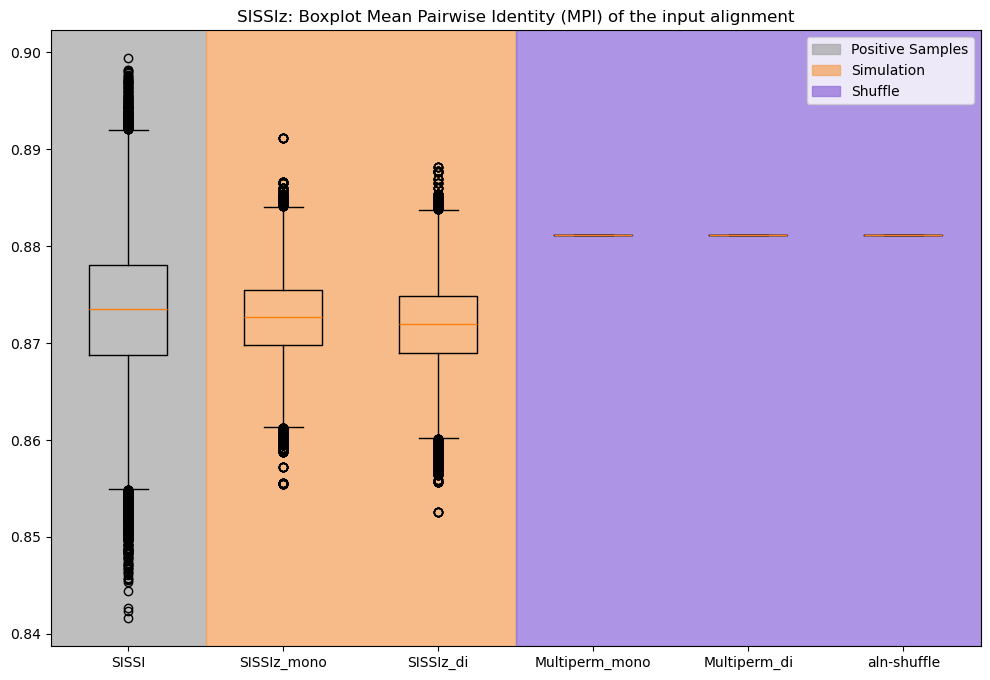

In [18]:
plot_columns('Mean Pairwise Identity (MPI) of the input alignment', None)

## Average MPI of the sampled alignments

/tmp/ipykernel_14620/1400211763.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)
/tmp/ipykernel_14620/1400211763.py:15: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(0.5, 1.5, color="darkgray", alpha=0.75, edgecolor="black", label='Positive Samples')
/tmp/ipykernel_14620/1400211763.py:16: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(1.5, 3.5, color="sandybrown", alpha=0.75, edgecolor="black", label='Simulation')
/tmp/ipykernel_14620/1400211763.py:17: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(3.5, 6.5, color="mediumpurple", alpha=0.75, edgecolor="black", label='Shuffle')


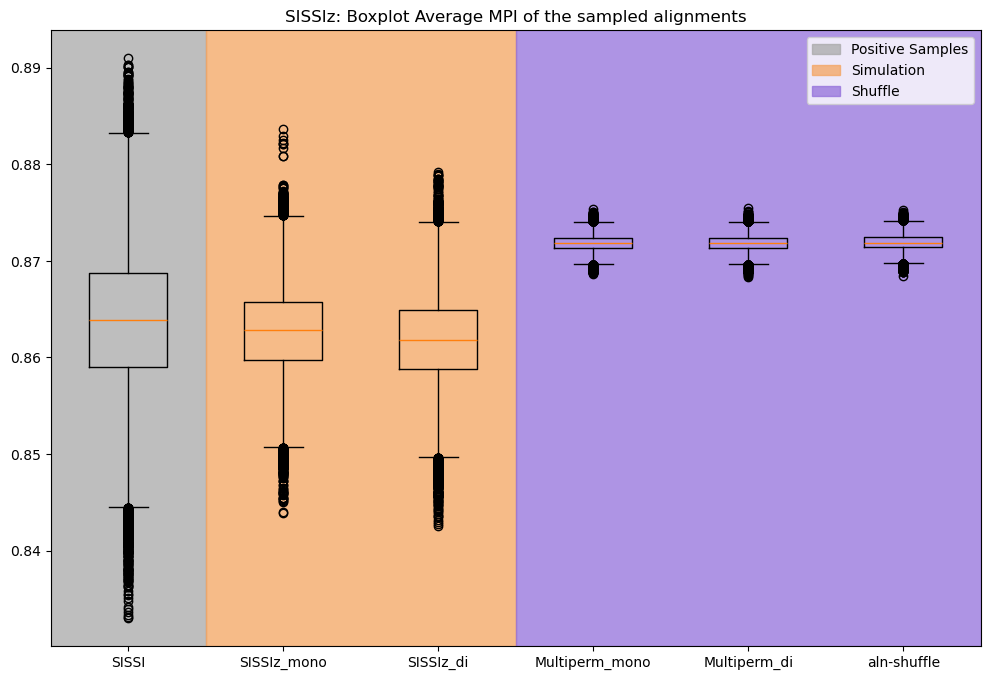

In [19]:
plot_columns('Average MPI of the sampled alignments', None)

## Standard deviation of the MPIs of the sampled alignments

/tmp/ipykernel_14620/1400211763.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)
/tmp/ipykernel_14620/1400211763.py:15: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(0.5, 1.5, color="darkgray", alpha=0.75, edgecolor="black", label='Positive Samples')
/tmp/ipykernel_14620/1400211763.py:16: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(1.5, 3.5, color="sandybrown", alpha=0.75, edgecolor="black", label='Simulation')
/tmp/ipykernel_14620/1400211763.py:17: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(3.5, 6.5, color="mediumpurple", alpha=0.75, edgecolor="black", label='Shuffle')


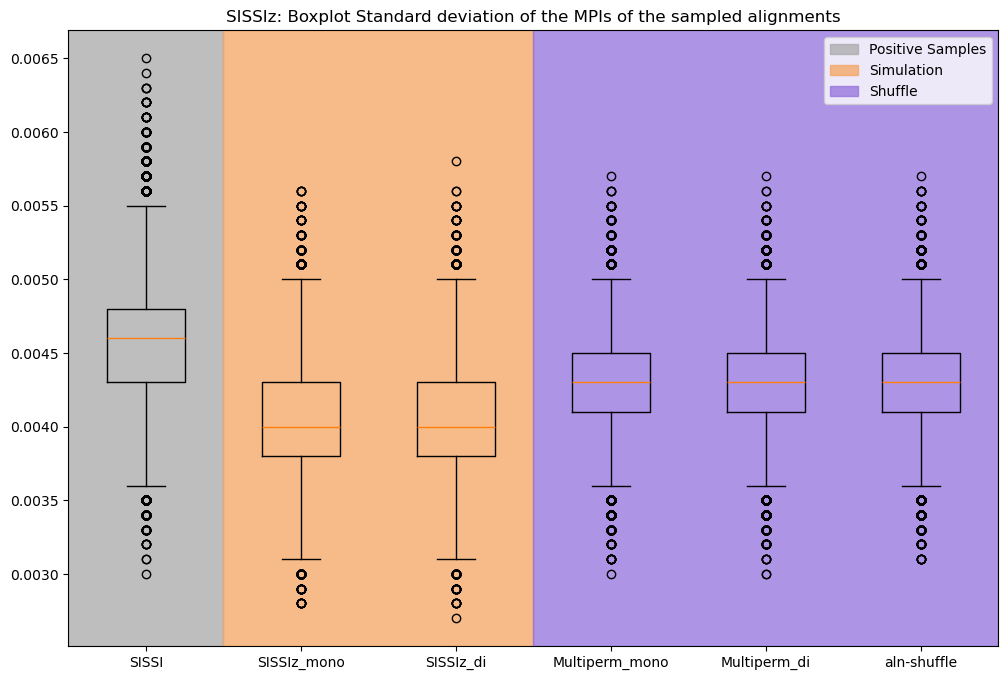

In [20]:
plot_columns('Standard deviation of the MPIs of the sampled alignments', None)

## Structural Conservation Index (SCI)

/tmp/ipykernel_14620/1400211763.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)
/tmp/ipykernel_14620/1400211763.py:15: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(0.5, 1.5, color="darkgray", alpha=0.75, edgecolor="black", label='Positive Samples')
/tmp/ipykernel_14620/1400211763.py:16: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(1.5, 3.5, color="sandybrown", alpha=0.75, edgecolor="black", label='Simulation')
/tmp/ipykernel_14620/1400211763.py:17: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(3.5, 6.5, color="mediumpurple", alpha=0.75, edgecolor="black", label='Shuffle')


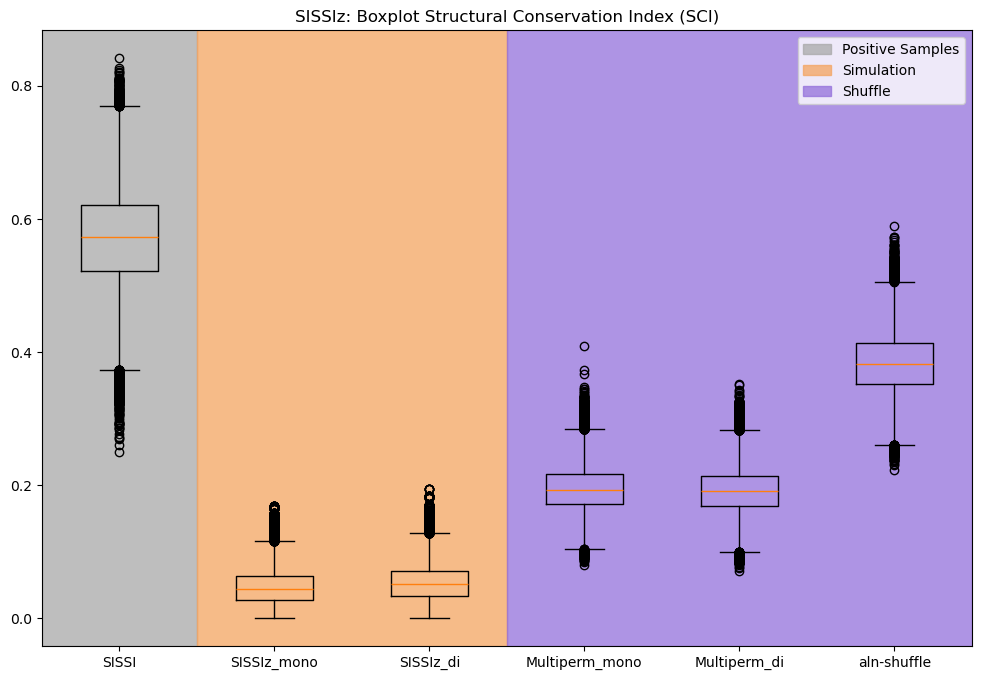

In [21]:
plot_columns('Structural Conservation Index (SCI)', None)

## GC-Content

/tmp/ipykernel_14620/1400211763.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)
/tmp/ipykernel_14620/1400211763.py:15: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(0.5, 1.5, color="darkgray", alpha=0.75, edgecolor="black", label='Positive Samples')
/tmp/ipykernel_14620/1400211763.py:16: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(1.5, 3.5, color="sandybrown", alpha=0.75, edgecolor="black", label='Simulation')
/tmp/ipykernel_14620/1400211763.py:17: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(3.5, 6.5, color="mediumpurple", alpha=0.75, edgecolor="black", label='Shuffle')


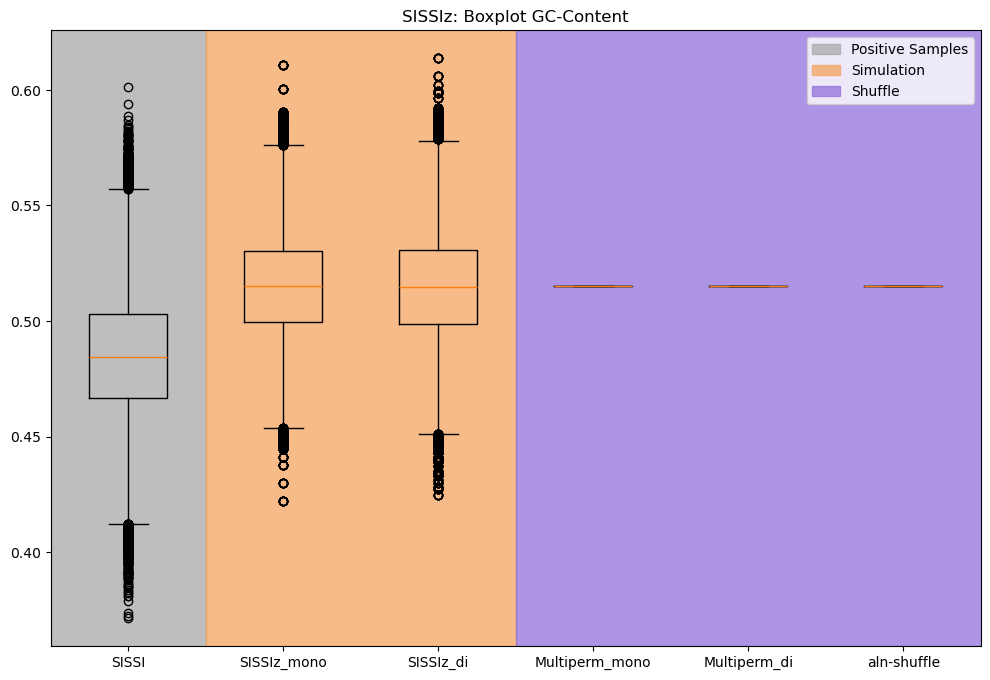

In [22]:
plot_columns('GC-Content', None)

## RNAalifold consensus Minimum Free Energy (MFE) of the original alignment

/tmp/ipykernel_14620/1400211763.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)
/tmp/ipykernel_14620/1400211763.py:15: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(0.5, 1.5, color="darkgray", alpha=0.75, edgecolor="black", label='Positive Samples')
/tmp/ipykernel_14620/1400211763.py:16: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(1.5, 3.5, color="sandybrown", alpha=0.75, edgecolor="black", label='Simulation')
/tmp/ipykernel_14620/1400211763.py:17: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(3.5, 6.5, color="mediumpurple", alpha=0.75, edgecolor="black", label='Shuffle')


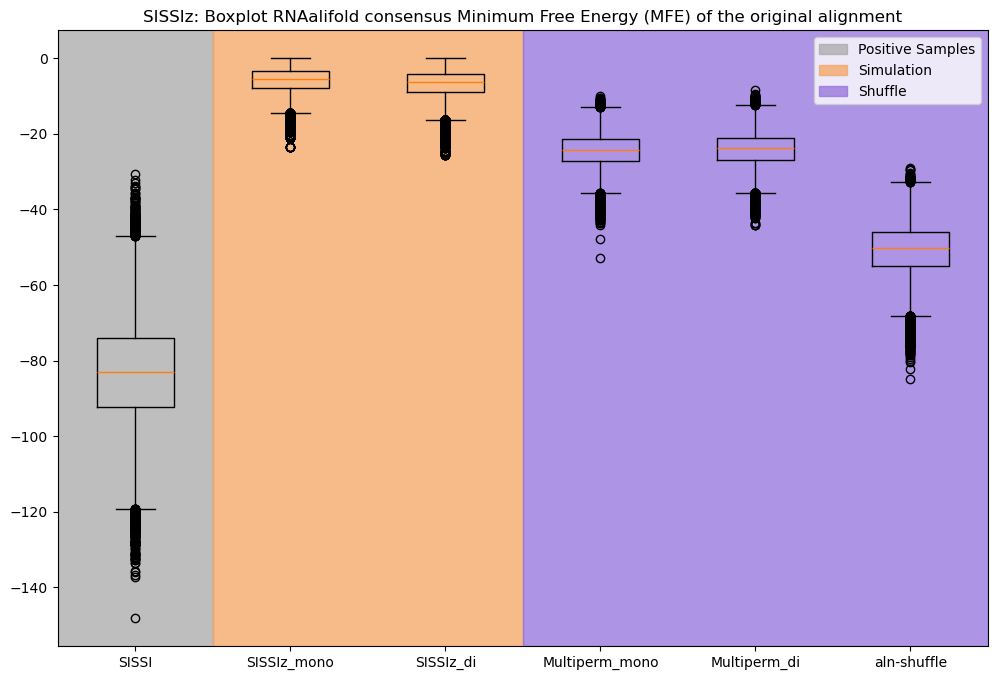

In [23]:
plot_columns('RNAalifold consensus Minimum Free Energy (MFE) of the original alignment', None)

## Average consensus MFE in the sampled alignments

/tmp/ipykernel_14620/1400211763.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)
/tmp/ipykernel_14620/1400211763.py:15: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(0.5, 1.5, color="darkgray", alpha=0.75, edgecolor="black", label='Positive Samples')
/tmp/ipykernel_14620/1400211763.py:16: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(1.5, 3.5, color="sandybrown", alpha=0.75, edgecolor="black", label='Simulation')
/tmp/ipykernel_14620/1400211763.py:17: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(3.5, 6.5, color="mediumpurple", alpha=0.75, edgecolor="black", label='Shuffle')


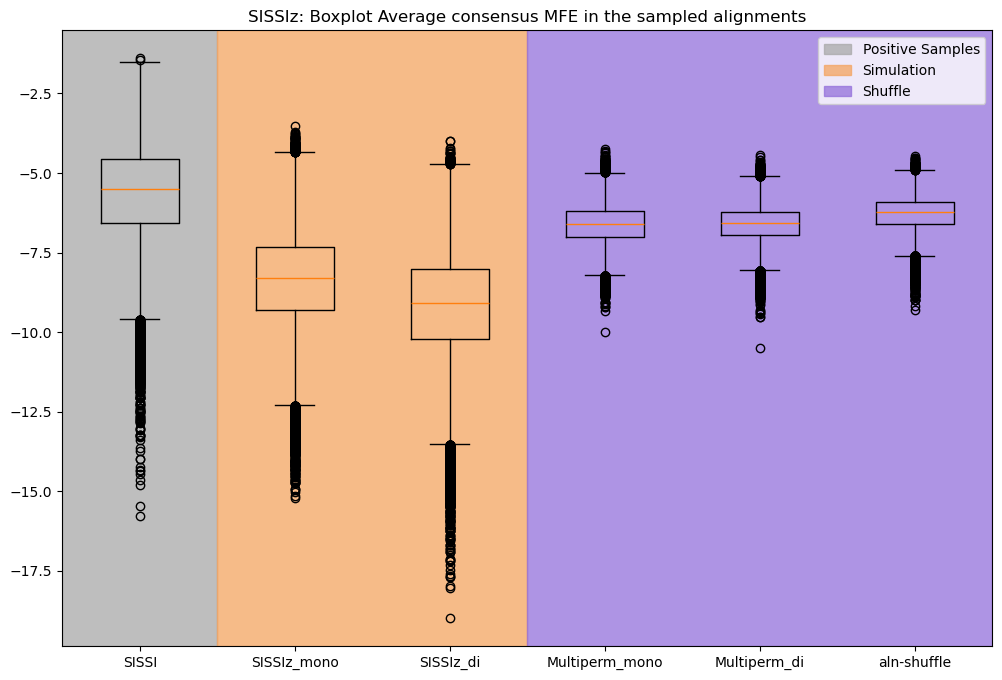

In [24]:
plot_columns('Average consensus MFE in the sampled alignments', None)

## Standard deviation of the consensus MFE in the sampled alignments

/tmp/ipykernel_14620/1400211763.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)
/tmp/ipykernel_14620/1400211763.py:15: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(0.5, 1.5, color="darkgray", alpha=0.75, edgecolor="black", label='Positive Samples')
/tmp/ipykernel_14620/1400211763.py:16: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(1.5, 3.5, color="sandybrown", alpha=0.75, edgecolor="black", label='Simulation')
/tmp/ipykernel_14620/1400211763.py:17: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(3.5, 6.5, color="mediumpurple", alpha=0.75, edgecolor="black", label='Shuffle')


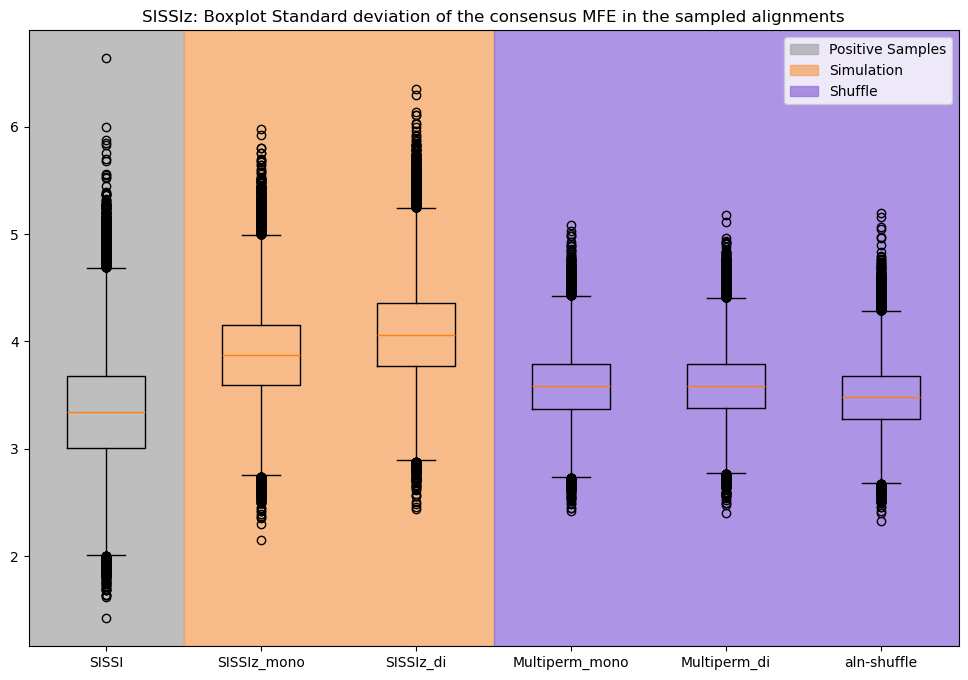

In [25]:
plot_columns('Standard deviation of the consensus MFE in the sampled alignments', None)

## z-score 

/tmp/ipykernel_14620/1400211763.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)
/tmp/ipykernel_14620/1400211763.py:15: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(0.5, 1.5, color="darkgray", alpha=0.75, edgecolor="black", label='Positive Samples')
/tmp/ipykernel_14620/1400211763.py:16: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(1.5, 3.5, color="sandybrown", alpha=0.75, edgecolor="black", label='Simulation')
/tmp/ipykernel_14620/1400211763.py:17: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(3.5, 6.5, color="mediumpurple", alpha=0.75, edgecolor="black", label='Shuffle')


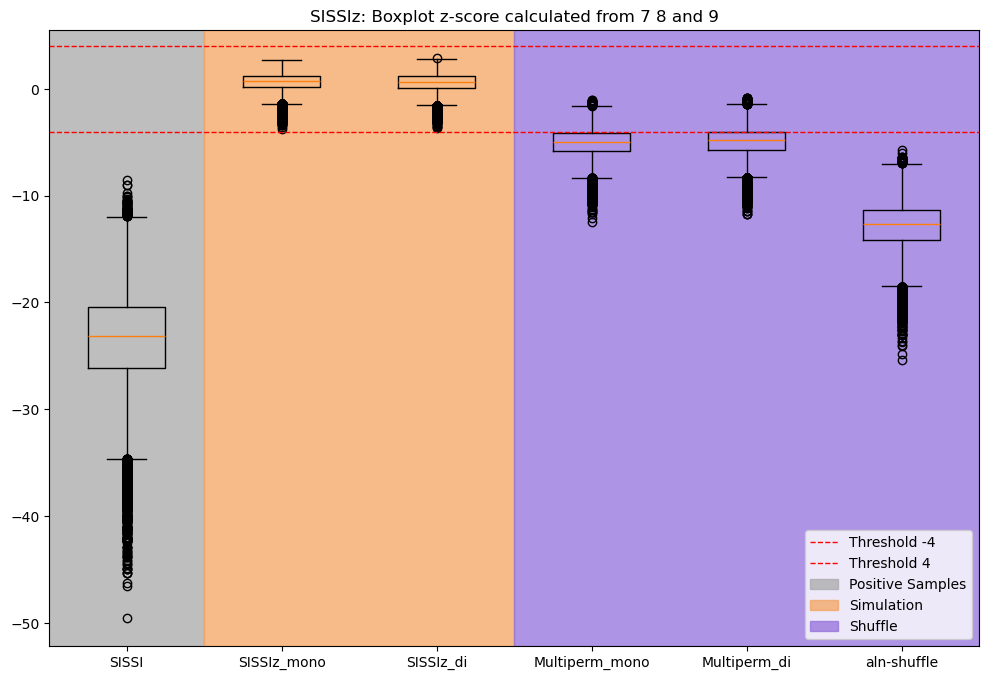

In [27]:
plot_columns('z-score calculated from 7 8 and 9', [-4, 4])